## **Financial Sentiment Analysis**
**Mayank Pujara**

---
This project delves into the realm of Financial Sentiment Analysis, leveraging advanced NLP techniques to decipher sentiments from textual data derived from diverse sources such as financial news, social media, and reports. By exploring the relationship between textual sentiment and asset prices, the project aims to offer valuable insights crucial for investors, traders, and financial analysts.


### **Importing necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import string

# NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Reading the CSV file containing the sentences into a Pandas DataFrame**

In [ ]:
data = pd.read_csv('/content/data.csv')
print(data.head())

                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral


### **Data Preprocessing & Cleaning**

In [ ]:
def preprocessText(text):
    text = text.translate(str.maketrans('', '', string.punctuation)) # Removing the punctuation from the text
    tokens = word_tokenize(text.lower())  # Tokenizing the text into individual words and converting them to lowercase
    stopWords = set(stopwords.words('english')) # Setting the stopwords
    lemmatizer = WordNetLemmatizer()
    filteredTokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopWords]
    return ' '.join(filteredTokens)

# Applying preprocessing to the 'Sentence' column
data['ProcessedSentence'] = data['Sentence'].apply(preprocessText)

### **Feature Extraction using TfidfVectorizer**

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['ProcessedSentence'])
y = data['Sentiment']

### **Splitting the data into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Model Implementation using Logistic Regression model from the scikit-learn library**

In [ ]:
# Initialization and training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions on the test set
predictions = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the model is: {accuracy*100:.2f} %")

Accuracy of the model is: 70.06 %


### **Classification report**

In [ ]:
report = classification_report(y_test, predictions)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

    negative       0.46      0.14      0.21       175
     neutral       0.69      0.90      0.78       622
    positive       0.77      0.63      0.70       372

    accuracy                           0.70      1169
   macro avg       0.64      0.56      0.56      1169
weighted avg       0.68      0.70      0.67      1169



### **Confusion Matrix**

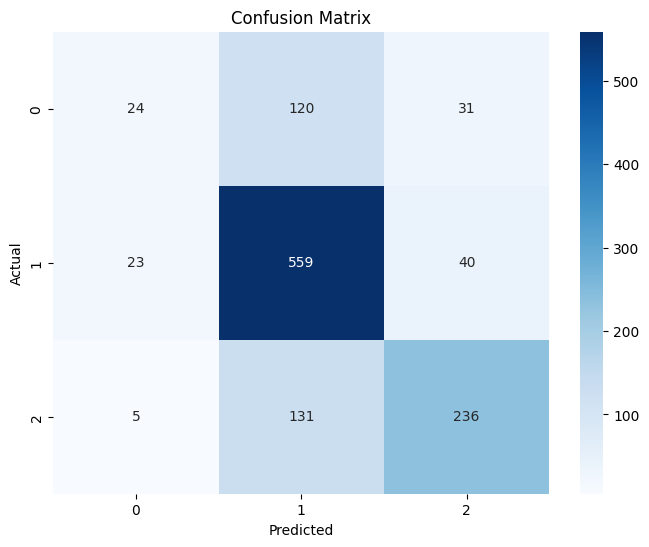

In [ ]:
confusionMatrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Data Visualization**

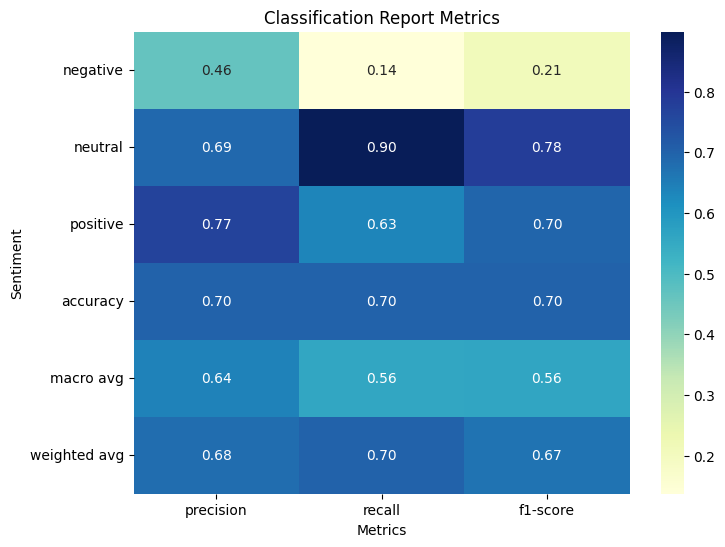

In [ ]:
reportDictionary = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(reportDictionary).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:, :3], annot=True, cmap='YlGnBu', fmt='.2f')
plt.xlabel('Metrics')
plt.ylabel('Sentiment')
plt.title('Classification Report Metrics')
plt.show()

### **Sentiment prediction on a custom input**

In [ ]:
customText = "The stock market showed positive gains despite economic challenges."
customProcessed = preprocessText(customText)
custom_tfidf = vectorizer.transform([customProcessed])
customPrediction = model.predict(custom_tfidf)
print("The Input Sentence is:", customText)
print(f"\nThe Sentiment Prediction of the above sentence: {customPrediction[0]}")

The Input Sentence is: The stock market showed positive gains despite economic challenges.

The Sentiment Prediction of the above sentence: positive
